In [ ]:
valid_classes = [0,85, 170]
class_names = ["Background","Pupil","Iris"]


class_map = dict(zip(valid_classes, range(len(valid_classes))))
n_classes=len(valid_classes)


colors = [ [  0,   0,   0],[0,255,0],[0,0,255]]
label_colours = dict(zip(range(n_classes), colors))


In [ ]:
import cv2
import os
import torch
from torch import nn
import numpy as np
from matplotlib import pyplot as plt
from skimage.measure import label,regionprops,find_contours

In [ ]:
img_path = "/home/nipun/Documents/Uni_Malta/Datasets/Datasets/Miche/Miche_Dataset/train_img/009_GT2_IN_F_LI_01_2.jpg"
mask_path = "/home/nipun/Documents/Uni_Malta/Datasets/Datasets/Miche/Miche_Dataset/train_masks/009_GT2_IN_F_LI_01_2.bmp"


In [ ]:
img = cv2.imread(img_path,cv2.IMREAD_COLOR) # Read Image as BGR

print(img.shape)
# h,w = img.shape[:2]
h,w = 400,400

img = cv2.resize(img,(w,h))


plt.imshow(img[:,:,::-1])



In [ ]:
mask = cv2.imread(mask_path)

mask = cv2.cvtColor(cv2.resize(mask,(w,h)),cv2.COLOR_BGR2GRAY)

print(mask.shape)
plt.imshow(mask)

In [ ]:
median = cv2.medianBlur(mask, 5)
        
edge_detected_image = cv2.Canny(median, 12, 234)


contours, hierarchy = cv2.findContours(edge_detected_image, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

In [ ]:
plt.imshow(edge_detected_image)

In [ ]:
print(len(contours)) 


In [ ]:
bg_mask = np.zeros_like(img)


print(bg_mask.shape)

In [ ]:
max_area = {}
for contour in contours:
    
    approx = cv2.approxPolyDP(contour,0.01*cv2.arcLength(contour,True),True)
    area = cv2.contourArea(contour)
    # print(area)
    if ((len(approx) > 8) & (len(approx) < 23) & (area > 30) ):
        
        
        max_area[area] = contour
        

x = sorted(max_area,key = lambda x:x)
print(x)
max_contour = max_area[x[-1]]
min_contour = max_area[x[1]]

In [ ]:
cv2.drawContours(bg_mask, [max_contour],  0, (0,255,0), -1)

cv2.drawContours(bg_mask,[min_contour],0,(0,0,255),-1)


In [ ]:
plt.imshow(bg_mask)

In [ ]:
color_map = [[0,0,0],[0,255,0],[0,0,255]]

In [ ]:
# area = cv2.contourArea(min_contour)
# print(area)

print(np.unique(bg_mask))

In [ ]:
output_mask = []
for i,color in enumerate(color_map):
    cmap = np.all(np.equal(bg_mask,color),axis=-1)
    output_mask.append(cmap)
output_mask = np.stack(output_mask,axis=-1)

In [ ]:
grayscale_mask = np.argmax(output_mask, axis=-1)
grayscale_mask = (grayscale_mask / len(color_map)) * 255

In [ ]:
plt.figure(figsize=(15,15))
plt.imshow(grayscale_mask)
cv2.imwrite("Inspection_1.png",grayscale_mask)

In [ ]:
plt.figure(figsize=(15,15))
plt.imshow(img[:,:,::-1])
plt.imshow(grayscale_mask,alpha=0.5)

In [ ]:
resized_image = cv2.resize(img,(64,64))

resized_mask = cv2.resize(grayscale_mask,(256,256))


resized_image = cv2.resize(resized_image,(256,256))

In [ ]:
# Mask Changes
# if masks are resized into image sizes then shape of the mask won't change even mask and image have different image dimensions.
# if masks and images are resized into fixed image sizes ,mask shape won't change


In [ ]:
plt.figure(figsize=(15,15))
plt.imshow(resized_mask)

In [ ]:
cv2.imwrite("Inspection_2.png",resized_mask)

In [ ]:
approx_max = cv2.approxPolyDP(max_contour,0.001*cv2.arcLength(max_contour,True),True)
approx_min =  cv2.approxPolyDP(min_contour,0.001*cv2.arcLength(min_contour,True),True)

In [ ]:
print(cv2.contourArea(max_contour))
print(cv2.contourArea(approx_max))
print(cv2.contourArea(min_contour))
print(cv2.contourArea(approx_min))

In [ ]:
bg_up_1 = np.zeros_like(img)
# print(bg_up_1.shape)

In [ ]:
cv2.drawContours(bg_up_1 , [approx_max],  0, (0,255,0), cv2.FILLED)

cv2.drawContours(bg_up_1 ,[approx_min],0,(0,0,255),cv2.FILLED) 

In [ ]:
plt.imshow(bg_up_1)

In [ ]:
plt.figure(figsize=(15,15))
plt.imshow(img[:,:,::-1])
plt.imshow(bg_up_1,alpha=0.5)

In [ ]:
cv2.imwrite("Inspection_3.png",bg_up_1)

In [ ]:
cv2.imwrite("Inspection_4.png",cv2.resize(bg_up_1,(256,256)))

In [ ]:
from shapely.geometry import Polygon


In [ ]:
poly_1 = []
for coords in approx_max:
    # print(coords[0])
    poly_1.append(coords[0])

In [ ]:
poly_2 = []
for coords in approx_min:
    # print(coords[0])
    poly_2.append(coords[0])

In [ ]:
polygon1 = Polygon(poly_1)
polygon2 = Polygon(poly_2)

In [ ]:
difference = polygon1.difference(polygon2)

In [ ]:
approx_max.shape

In [ ]:
approx_max[0]

In [ ]:
intersect_part = list(difference.exterior.coords)

In [ ]:
cont_up = []
for coords in intersect_part:
    cont_up.append([coords])
    

In [ ]:
cont_up = np.array(cont_up).astype(np.int32)

In [ ]:
cont_up.dtype

In [ ]:
intersect_part[0]

In [ ]:

bg_up_2 = np.zeros_like(img)

In [ ]:
# cv2.drawContours(bg_up_2 , [cont_up],  0, (0,255,0), -1)

In [ ]:
plt.imshow(bg_up_2)

In [ ]:
from PIL import Image,ImageFilter

mask_path = "/home/nipun/Documents/Uni_Malta/Datasets/Datasets/Miche/Miche_Dataset/train_masks/003_GS4_IN_R_RI_01_1.bmp"

img = Image.open(mask_path)

In [ ]:
# im_5 = im_1.filter(ImageFilter.EDGE_ENHANCE) 
im_6 = img.filter(ImageFilter.EDGE_ENHANCE_MORE) 

In [ ]:
im_6.save("EdgeEnhanced_Image.png")

In [ ]:
mask = cv2.imread("/home/nipun/Documents/Uni_Malta/LuminEye/LuminEye-Experiments/utils/Masks_with_256/075_GT2_OU_F_LI_01_1.png",0)
img = cv2.imread("/home/nipun/Documents/Uni_Malta/Datasets/Datasets/Miche/Miche_Dataset/train_img/075_GT2_OU_F_LI_01_1.jpg")

In [ ]:
img = cv2.resize(img,(256,256))

In [ ]:
# plt.imshow(img[:,:,::-1])

mask = decode_segmap(mask)

In [ ]:

plt.figure(figsize=(15,15))
plt.imshow(img[:,:,::-1])
plt.imshow(mask,alpha=0.5)

In [ ]:
plt.imshow(img[:,:,::-1])

In [ ]:

colors = [ [  0,   0,   0],[0,255,0],[0,0,255]]
label_colours = dict(zip(range(n_classes), colors))

valid_classes = [0,85, 170]
class_names = ["Background","Pupil","Iris"]


class_map = dict(zip(valid_classes, range(len(valid_classes))))
n_classes=len(valid_classes)


def decode_segmap(temp):
    #convert gray scale to color
    # temp=temp.numpy()
    r = temp.copy()
    g = temp.copy()
    b = temp.copy()
    for l in range(0, n_classes):
        r[temp == l] = label_colours[l][0]
        g[temp == l] = label_colours[l][1]
        b[temp == l] = label_colours[l][2]

    rgb = np.zeros((temp.shape[0], temp.shape[1], 3))
    rgb[:, :, 0] = r / 255.0
    rgb[:, :, 1] = g / 255.0
    rgb[:, :, 2] = b / 255.0
    return rgb


In [ ]:
mask = cv2.imread("/home/nipun/Documents/Uni_Malta/Datasets/Datasets/Miche/Miche_Dataset/train_masks/075_GT2_OU_F_LI_01_1.bmp")
img = cv2.imread("/home/nipun/Documents/Uni_Malta/Datasets/Datasets/Miche/Miche_Dataset/train_img/075_GT2_OU_F_LI_01_1.jpg")


print(img.shape)
print(mask.shape)

In [ ]:
plt.figure(figsize=(15,15))
plt.imshow(img[:,:,::-1])
plt.imshow(mask,alpha=0.5)

In [ ]:
median = cv2.medianBlur(mask, 5)
        
edge_detected_image = cv2.Canny(median, 12, 234)


contours, hierarchy = cv2.findContours(edge_detected_image, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

In [ ]:
max_area = {}
for contour in contours:
    
    approx = cv2.approxPolyDP(contour,0.01*cv2.arcLength(contour,True),True)
    area = cv2.contourArea(contour)
    # print(area)
    if ((len(approx) > 8) & (len(approx) < 23) & (area > 30) ):
        
        
        max_area[area] = contour
        

x = sorted(max_area,key = lambda x:x)
print(x)
max_contour = max_area[x[-1]]
min_contour = max_area[x[1]]

In [ ]:
approx_max = cv2.approxPolyDP(max_contour,0.001*cv2.arcLength(max_contour,True),True)
approx_min =  cv2.approxPolyDP(min_contour,0.001*cv2.arcLength(min_contour,True),True)

In [ ]:
m1 = np.zeros_like(img)

print(m1.shape)

In [ ]:
cv2.drawContours(m1 , [approx_max],  0, (0,255,0), cv2.FILLED)

cv2.drawContours(m1 ,[approx_min],0,(0,0,255),cv2.FILLED) 

In [ ]:
plt.figure(figsize=(15,15))
plt.imshow(img[:,:,::-1])
plt.imshow(m1,alpha=0.5)

In [ ]:
cv2.imwrite("Inspection_4.png",m1)

In [ ]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import numpy as np
import mediapipe
import pandas as pd

In [ ]:
image_dir = '/home/nipun/Pictures/My_New_Dataset'

In [ ]:

saved_dir = "./eyes_mine"


if not os.path.exists(saved_dir):
    os.makedirs(saved_dir)

In [ ]:
def mpArrayToNumpy(landmark_array, img):

    shape_arr = []

    for landmark in landmark_array.landmark:
        x = landmark.x
        y = landmark.y

        relative_x = int(x * img.shape[1])
        relative_y = int(y * img.shape[0])

        shape_arr.append([relative_x, relative_y])

    return np.array(shape_arr)


def cropped_image(img, shape_array, padded_amt=30):
    """Cropped eye region 

    Args:
        img (__numpy__): _Original Image_
        shape_array (_numpy_): _FaceLandMark locations_
        padded_amt (int, optional): _padding size_. Defaults to 15.

    """

    Leye = {"top_left": shape_array[70], "bottom_right": shape_array[133]}

    Reye = {"top_left": shape_array[285],
            "bottom_right": shape_array[446]}

    left_eye = img[Leye["top_left"][1]:Leye["bottom_right"][1] +
                   15
                   , Leye["top_left"][0]:Leye["bottom_right"][0]]

    right_eye = img[Reye["top_left"][1]:Reye["bottom_right"][1] +
                    30, Reye["top_left"][0]-5:Reye["bottom_right"][0]]
    
    
    
    Reye['top_left'][0] = Reye['top_left'][0] - 5

    return left_eye, right_eye, Leye, Reye

In [ ]:
mp_face_mesh = mediapipe.solutions.face_mesh

face_mesh = mp_face_mesh.FaceMesh(static_image_mode=True)

In [ ]:
image_count = 0
visualize = True
data_array =[]


for img_path in os.scandir(image_dir):

    
    img = cv2.imread(img_path.path)

    
    
    results = face_mesh.process(img)
    
    if results.multi_face_landmarks is not None:
        image_count +=1
        
        img_name = f'I2head_{image_count}'
        
        landmarks = results.multi_face_landmarks[0]

        shape_arr = mpArrayToNumpy(landmarks, img)

        left_eye, right_eye, Leye, Reye = cropped_image(
            img, shape_arr)
        


        cv2.imwrite(os.path.join(
            saved_dir, f"{img_name}_left.png"), left_eye)

        cv2.imwrite(os.path.join(
            saved_dir, f"{img_name}_right.png"), right_eye)

        if visualize:

            

            fig, axs = plt.subplots(1, 2)

            axs[0].set_title("Left Eye")
            axs[1].set_title("Right Eye")

            axs[0].axis("off")
            axs[1].axis("off")

            axs[0].imshow(left_eye[:, :, ::-1])
            axs[1].imshow(right_eye[:, :, ::-1])

            plt.tight_layout()
            plt.show()
            plt.close('all')

    else:
        print(
            f"MediaPipe was failed to detect the faces on the image name {img_name}")
        continue

In [ ]:
# Yolo Cropping Eye

In [ ]:
import torch
import torch.nn as nn
import numpy as np
import os
from torch.utils.data import Dataset
import torch
from PIL import Image
import matplotlib.pyplot as plt
from albumentations.pytorch import ToTensorV2
import albumentations as A
import torch.nn as nn
from torch.optim import Adam
from tqdm import tqdm
from glob import glob
import segmentation_models_pytorch as smp
import torch.nn.functional as F
import cv2
import time 
device =torch.device("cuda" if torch.cuda.is_available() else "cpu")


train_images = "/home/nipun/Documents/Uni_Malta/Datasets/Datasets/Miche/train_img"
train_masks  = "/home/nipun/Documents/Uni_Malta/Datasets/Datasets/Miche/train_masks"


val_images = "/home/nipun/Documents/Uni_Malta/Datasets/Datasets/Miche/val_img"

val_masks =  "/home/nipun/Documents/Uni_Malta/Datasets/Datasets/Miche/val_masks" 




In [ ]:
saved_img_location = "/home/nipun/Documents/Uni_Malta/Datasets/Datasets/Miche/YoloCroppedEyes/images"
saved_mask_location = "/home/nipun/Documents/Uni_Malta/Datasets/Datasets/Miche/YoloCroppedEyes/masks"


if not os.path.exists(saved_img_location):
    os.makedirs(saved_img_location)


if not os.path.exists(saved_mask_location):
    os.makedirs(saved_mask_location)

In [ ]:

train_x = sorted(
        glob(f"{train_images}/*"))
train_y = sorted(
        
        glob(f"{train_masks}/*"))
valid_x = sorted(
        glob(f"{val_images}/*"))
valid_y = sorted(
        glob(f"{val_masks }/*"))


yolo_model_path = "/home/nipun/Music/yolov5/runs/train/exp8/weights/best.pt"
model = torch.hub.load('ultralytics/yolov5', 'custom', path=yolo_model_path ,force_reload=True)

# Filter BBOX Based on Confidence
model.conf = 0.40


saved_img_location = "/home/nipun/Documents/Uni_Malta/Datasets/Datasets/Miche/YoloCroppedEyes/images"
saved_mask_location = "/home/nipun/Documents/Uni_Malta/Datasets/Datasets/Miche/YoloCroppedEyes/masks"



if not os.path.exists(saved_img_location ):
    os.makedirs(saved_img_location)
    
    


if not os.path.exists(saved_mask_location):
    os.makedirs(saved_mask_location)

In [ ]:
train_x = ["/home/nipun/Documents/Uni_Malta/Datasets/Datasets/Miche/train_img/010_GS4_OU_F_RI_01_1.jpg"]

train_y = ["/home/nipun/Documents/Uni_Malta/Datasets/Datasets/Miche/train_masks/010_GS4_OU_F_RI_01_1.bmp"]

In [ ]:
def find_contours(image):
    gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    median = cv2.medianBlur(gray, 5)
        
    edge_detected_image = cv2.Canny(median, 0, 200)
    


    contours, hierarchy = cv2.findContours(edge_detected_image, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    
    return contours

In [ ]:
%matplotlib inline

RESIZE_AMT = 256




for z, (img_path, mask_path) in enumerate(zip(valid_x, valid_y)):
    
    
    
    pad_top_x1 = 50
    pad_bottom_y2 = 65
    pad_top_left_y1 = 30
    pad_bottom_right_x2 = 15

    
    image = cv2.imread(img_path)

    h, w = image.shape[:2]
    
    mask =  cv2.imread(mask_path)
    
    
    
    print(img_path)
    

    results = model(image[:, :, ::-1], size=640)

    df = results.pandas().xyxy[0]

    # Get the all BBOX related to Iris Class which is zero
    df = df[df["class"] == 0]

    df = df[df['confidence'] == df['confidence'].max()]

    

    for (i, row) in df.iterrows():

        x1 = round(row["xmin"])
        y1 = round(row["ymin"])
        x2 = round(row["xmax"])
        y2 = round(row["ymax"])
    print(image.shape)
    print(x1,y1,x2,y2)
    copy_img = image.copy()

    if (y1 -pad_top_left_y1)<0:
        pad_top_left_y1 = y1


    if  (x1-pad_top_x1)<0:
        pad_top_x1 = x1
    
    cropped_img = copy_img[y1-pad_top_left_y1:y2 +
                                pad_bottom_y2 , x1-pad_top_x1:x2+pad_bottom_right_x2]

    cropped_mask = mask[y1-pad_top_left_y1:y2 +
                                pad_bottom_y2 , x1-pad_top_x1:x2+pad_bottom_right_x2]
    cropped_mask = np.where(cropped_mask > 0, 255, 0)

    image_name = img_path.split("/")[-1]
    mask_name = mask_path.split("/")[-1]
    
    
    
    
    # draw_img = cropped_img.copy()
    
    # gt_contours  = find_contours(cropped_mask.astype(np.uint8))
    
   
    
    # for gt_cnt in gt_contours:
    #         cv2.drawContours(cropped_img, [gt_cnt],  -1, (0,255,0), 1)
    
    
    
    
    # for gt_cnt in gt_contours:
    #     cv2.drawContours(draw_img, [gt_cnt],  -1, (0, 255, 0), 1)

    cv2.imwrite(os.path.join(saved_img_location, image_name), cropped_img)
    cv2.imwrite(os.path.join(
        saved_mask_location, mask_name), cropped_mask)
    
    
    # plt.imshow(cropped_img[:,:,::-1])
    # plt.show()
   
    # plt.imshow(cropped_mask)
    # plt.show()
    
    
    # if z==50:
    #     break



In [ ]:
x_sorted = sorted(contour,key=lambda x:x[0])

y_sorted = sorted(contour,key=lambda x:x[1])

In [ ]:
min_x = x_sorted[0][0]
max_x = x_sorted[-1][0]

In [ ]:
min_y = y_sorted[0][0]
max_y = y_sorted[-1][0]

In [ ]:
print(min_y)

print(max_y)

In [ ]:
img_path = "/home/nipun/Documents/Uni_Malta/Datasets/Datasets/Miche/train_img/009_GT2_IN_F_LI_01_2.jpg"
img = cv2.imread(img_path)

mask_path = "/home/nipun/Documents/Uni_Malta/Datasets/Datasets/Miche/train_masks/009_GT2_IN_F_LI_01_2.bmp"
mask = cv2.imread(mask_path)

In [ ]:
def getMinMaxXY(contour):
    contours = []
    for i in contour:
        contours.append(list(i[0]))
        
    x_sorted = sorted(contours,key=lambda x:x[0])

    y_sorted = sorted(contours,key=lambda x:x[1])
    
    min_x = x_sorted[0][0]
    max_x = x_sorted[-1][0]
    
    
    min_y = y_sorted[0][0]
    max_y = y_sorted[-1][0]
    
    
    return min_x,min_y,max_x,max_y
    

In [ ]:
plt.figure(figsize=(20,20))
plt.imshow(img[:,:,::-1])

In [ ]:
plt.imshow(mask[:,:,::-1])

In [ ]:
contours = find_contours(mask)

In [ ]:
for gt_cnt in contours:
            cv2.drawContours(img, [gt_cnt],  -1, (0,255,0), 1)

In [ ]:
plt.figure(figsize=(20,20))
plt.imshow(img[:,:,::-1])

In [ ]:
contour_img = np.zeros((img.shape[0],img.shape[1]))


print(contour_img.shape)

In [ ]:
%matplotlib inline


contours = np.array( [ [50,50], [50,150], [150, 150], [150,50] ] )

contours1 = np.array( [ [50,50], [50,150], [180, 150], [190,50] ] )
img = np.zeros( (200,200) ) # create a single channel 200x200 pixel black image 
cv2.fillPoly(img, pts =[contours], color=1)
cv2.fillPoly(img, pts =[contours1], color=2)


plt.imshow(img)

plt.show()







In [ ]:
contours = find_contours(mask)
big_contour = max(contours, key=cv2.contourArea)
peri = cv2.arcLength(big_contour, True)
big_contour = cv2.approxPolyDP(big_contour, 0.001 * peri, True)
cv2.drawContours(contour_img ,[big_contour], -1, (255,255,255), thickness=cv2.FILLED)

plt.imshow(contour_img )

In [ ]:
min_contour = min(contours, key=cv2.contourArea)
peri_min = cv2.arcLength(min_contour, True)
min_contour = cv2.approxPolyDP(min_contour , 0.001 * peri_min, True)

cv2.drawContours(contour_img ,[min_contour], -1, (255,0,0), thickness=cv2.FILLED)
plt.imshow(contour_img )

In [ ]:
import numpy as np

In [ ]:
image = np.array([[0,0,0,0],
                 [0,1,1,0],
                 [0,1,1,0],
                 [0,0,0,0],])


mask = np.array([[0,0,0,0],
                 [0,0,0,0],
                 [0,0,1,1],
                 [0,0,1,1],])

In [ ]:
# plt.imshow(image)
# plt.show()
# plt.imshow(mask)
# plt.show()


Intersection = 1
Union = (4 + 4 - 1)


print(Intersection/Union)

In [ ]:
mask_path = "/home/nipun/Documents/Uni_Malta/Datasets/Datasets/Miche/YoloCroppedEyes/train_masks/013_IP5_OU_R_RI_01_1.bmp"

In [ ]:
mask = cv2.imread(mask_path)

In [ ]:
plt.imshow(mask)

In [ ]:
import pandas as pd
df = pd.read_csv("/home/nipun/Documents/Uni_Malta/LuminEye/LuminEye-Experiments/utils/gi4eCenterCoordinates.csv")

In [ ]:
df.head()

In [ ]:
df = df.drop_duplicates(subset=["ImageName"])

In [ ]:
df.to_csv("gi4eCenterCoordinates_Update.csv")

# I2HEAD Data Preparation

In [ ]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import numpy as np
import mediapipe
import pandas as pd


def mpArrayToNumpy(landmark_array, img):

    shape_arr = []

    for landmark in landmark_array.landmark:
        x = landmark.x
        y = landmark.y

        relative_x = int(x * img.shape[1])
        relative_y = int(y * img.shape[0])

        shape_arr.append([relative_x, relative_y])

    return np.array(shape_arr)


def cropped_image(img, shape_array, padded_amt=15):
    """Cropped eye region 

    Args:
        img (__numpy__): _Original Image_
        shape_array (_numpy_): _FaceLandMark locations_
        padded_amt (int, optional): _padding size_. Defaults to 15.

    """

    Leye = {"top_left": shape_array[70], "bottom_right": shape_array[133]}

    Reye = {"top_left": shape_array[285],
            "bottom_right": shape_array[263]}

    left_eye = img[Leye["top_left"][1]:Leye["bottom_right"][1] +
                    padded_amt
                   , Leye["top_left"][0]:Leye["bottom_right"][0]]

    right_eye = img[Reye["top_left"][1]:Reye["bottom_right"][1]+20 ,Reye["top_left"][0]:Reye["bottom_right"][0]]
    
    
   

    return left_eye, right_eye, Leye, Reye


In [ ]:
mp_face_mesh = mediapipe.solutions.face_mesh

face_mesh = mp_face_mesh.FaceMesh(static_image_mode=True)

saved_dir = "./checkDataset"


if not os.path.exists(saved_dir):
    os.makedirs(saved_dir)

In [ ]:

IMG_PATH = '/home/nipun/Documents/Uni_Malta/Datasets/I2HEAD'

df = pd.read_csv('/home/nipun/Documents/Uni_Malta/Datasets/Center_Regression/Mix_Iris_Center_Gi42_BioId_H2HEAD_mp2gaze/All_COORDINATES/i2head_annotations.csv')

In [ ]:
visualize= True

image_count = 0

In [ ]:
for idx,row in df.iterrows():
    
    img_path = os.path.join(IMG_PATH,row["ImageName"].replace('"','')[7:])
    
    
    
    print(img_path)

    # print(row["ImageName"])    
    bbox = list(map(float,row["Coordinates"][1:-1].split(",")))
    
  
    
    left_center = bbox[2:4]

    
    
    
    right_center = bbox[8:10]
    img = cv2.imread(img_path)
    
    
    results = face_mesh.process(img)
    
    
    if results.multi_face_landmarks is not None:
        image_count +=1
        
        img_name = f'I2head_{image_count}'
        
        landmarks = results.multi_face_landmarks[0]

        shape_arr = mpArrayToNumpy(landmarks, img)

        left_eye, right_eye, Leye, Reye = cropped_image(
            img, shape_arr)
        
        
        print(Reye)
      
        left_center[0] = float(left_center[0]) - Leye['top_left'][0]
        left_center[1] = float(left_center[1]) - Leye['top_left'][1]
    
        
        right_center[0] = float(right_center[0]) -  Reye['top_left'][0]
        right_center[1] = float(right_center[1]) -  Reye['top_left'][1]
        
        
        if visualize:
            
            
            cv2.circle(left_eye, (int(left_center[0]), int(
                left_center[1])), 1, (0, 0, 255), -1)
            cv2.circle(right_eye, (int(right_center[0]), int(
                right_center[1] )), 1, (0, 0, 255), -1)


        

            fig, axs = plt.subplots(1, 2)

            axs[0].set_title("Left Eye")
            axs[1].set_title("Right Eye")

            axs[0].axis("off")
            axs[1].axis("off")

            axs[0].imshow(left_eye[:, :, ::-1])
            axs[1].imshow(right_eye[:, :, ::-1])

            plt.tight_layout()
            plt.show()
            plt.close('all')
 


        # cv2.imwrite(os.path.join(
        #     saved_dir, f"{img_name}_left.png"), left_eye)

        # cv2.imwrite(os.path.join(
        #     saved_dir, f"{img_name}_right.png"), right_eye)
    # break
    
    if idx ==50:
        break

In [ ]:
dataframe_path = "/home/nipun/Documents/Uni_Malta/Datasets/CenterRegression/I2HEAD/I2headCenterCoordinates.csv"

saved_location = "/home/nipun/Documents/Uni_Malta/Datasets/CenterRegression/I2HEAD"

In [ ]:
df = pd.read_csv(dataframe_path)

In [ ]:
msk = np.random.rand(len(df)) < 0.8

In [ ]:
train = df[msk]
test = df[~msk]

In [ ]:
train.to_csv(os.path.join(saved_location,"train.csv"))
test.to_csv(os.path.join(saved_location,"val.csv"))

In [ ]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

class AWing(nn.Module):

    def __init__(self, alpha=2.1, omega=14, epsilon=1, theta=0.5):
        super().__init__()
        self.alpha   = float(alpha)
        self.omega   = float(omega)
        self.epsilon = float(epsilon)
        self.theta   = float(theta)

    def forward(self, y_pred , y):
        lossMat = torch.zeros_like(y_pred)
        A = self.omega * (1/(1+(self.theta/self.epsilon)**(self.alpha-y)))*(self.alpha-y)*((self.theta/self.epsilon)**(self.alpha-y-1))/self.epsilon
        C = self.theta*A - self.omega*torch.log(1+(self.theta/self.epsilon)**(self.alpha-y))
        case1_ind = torch.abs(y-y_pred) < self.theta
        case2_ind = torch.abs(y-y_pred) >= self.theta
        lossMat[case1_ind] = self.omega*torch.log(1+torch.abs((y[case1_ind]-y_pred[case1_ind])/self.epsilon)**(self.alpha-y[case1_ind]))
        lossMat[case2_ind] = A[case2_ind]*torch.abs(y[case2_ind]-y_pred[case2_ind]) - C[case2_ind]
        return lossMat

class Loss_weighted(nn.Module):
    def __init__(self, W=10, alpha=2.1, omega=14, epsilon=1, theta=0.5):
        super().__init__()
        self.W = float(W)
        self.Awing = AWing(alpha, omega, epsilon, theta)

    def forward(self, y_pred , y, M):
        M = M.float()
        Loss = self.Awing(y_pred,y)
        weighted = Loss * (self.W * M + 1.)
        return weighted.mean()



In [ ]:


out    = torch.randn(4,69,64,64)
target = torch.randn(4,69,64,64)
M = torch.randn(4,69,64,64)
criterion = Loss_weighted()
lossV = criterion(out,target,M)
print(lossV)
#loss vis
"""
import matplotlib.pyplot as plt

plt.show()"""

In [ ]:
lossmap = lossV.detach()[0,-1].numpy()
plt.imshow(lossmap)

In [ ]:
x = [1,2,3,4,5,]

In [2]:
import pandas as pd
import os
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import numpy as np
import mediapipe
import pandas as pd

img_dir = "/home/nipun/Documents/Uni_Malta/Datasets/gi4e_database/images/"

In [3]:

mp_face_mesh = mediapipe.solutions.face_mesh

face_mesh = mp_face_mesh.FaceMesh(static_image_mode=True)

INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


In [64]:
df = pd.read_csv("/home/nipun/Desktop/AllMixDataset/GI4E/gi4eAllCoordinatesTrain.csv")

In [65]:
df.shape

(2201, 2)

In [66]:
df.head()

,ImageName,Coordinates
0,017_01.png,"[399.61, 225.91, 413.67, 224.48, 426.82, 226.3..."
1,017_02.png,"[411.46, 223.7, 427.86, 222.27, 439.32, 224.09..."
2,017_03.png,"[410.68, 223.7, 425.13, 222.53, 438.28, 224.35..."
3,017_04.png,"[409.11, 223.57, 422.14, 222.39, 436.98, 223.9..."
4,017_05.png,"[407.68, 224.87, 419.01, 223.7, 435.55, 225.52..."


In [106]:
image_processed = 0

image_defect = 0


data_array = []


for idx, row in allCoordinatesDF.iterrows():
    
    
    img_path = os.path.join(img_dir, row["ImageName"])
    
    bbox = row["Coordinates"]
    
    
    left_center = bbox[2:4]


    right_center = bbox[8:10]
    
    
    img = cv2.imread(img_path)

    results = face_mesh.process(img)

    if results.multi_face_landmarks is not None:
        
        
        
        
        img_name = row["ImageName"].split(".")[0]
    
        print(row["ImageName"]) 

        landmarks = results.multi_face_landmarks[0]

        shape_arr = mpArrayToNumpy(landmarks, img)

        left_eye, right_eye, Leye, Reye = cropped_image(
                img, shape_arr)

        left_center[0] = (float(left_center[0]) - Leye['top_left'][0])/left_eye.shape[1]
        left_center[1] = (float(left_center[1]) - Leye['top_left'][1])/left_eye.shape[0]
        right_center[0] = (float(right_center[0]) - Reye['top_left'][0])/right_eye.shape[1]
        right_center[1] = (float(right_center[1]) - Reye['top_left'][1])/right_eye.shape[0]
        
        
        
        
        if all(0<k<1 for k in left_center) and  all(0<l<1 for l in right_center):
             
        
            image_processed += 1
            
            
            cv2.imwrite(os.path.join(
                    saved_dir, f"{img_name}_left.png"), left_eye)

            cv2.imwrite(os.path.join(
                saved_dir, f"{img_name}_right.png"), right_eye)
            
            
            
            
            data_array.append({"ImageName": f"{img_name}_left.png",
                                "X1": float(left_center[0]),
                                "Y1": float(left_center[1])})

            data_array.append({"ImageName": f"{img_name}_right.png",
                            "X1": float(right_center[0]),
                            "Y1": float(right_center[1])})
            
        else:
            print(f"Eye Coordinates resulted Minus Coordinate")
            image_defect +=1
            continue
        
    else:
            print(
                f"MediaPipe was failed to detect the faces on the image name {img_name}")
            continue
            image_defect +=1

    
    print(bbox)
    # break

017_01.png
[399.61, 225.91, 413.67, 224.48, 426.82, 226.3, 464.84, 224.22, 479.43, 220.31, 493.75, 222.53]
017_02.png
[411.46, 223.7, 427.86, 222.27, 439.32, 224.09, 476.82, 223.18, 493.75, 220.05, 505.08, 221.75]
017_03.png
[410.68, 223.7, 425.13, 222.53, 438.28, 224.35, 475.91, 223.05, 491.14, 219.92, 503.78, 221.88]
017_04.png
[409.11, 223.57, 422.14, 222.39, 436.98, 223.96, 474.35, 222.92, 488.28, 219.92, 503.13, 221.75]
017_05.png
[407.68, 224.87, 419.01, 223.7, 435.55, 225.52, 472.66, 223.57, 484.77, 220.44, 501.43, 222.27]
017_06.png
[407.55, 224.74, 418.23, 224.35, 434.77, 225.26, 471.88, 223.31, 483.98, 221.09, 501.04, 222.79]
017_07.png
[407.68, 224.87, 419.92, 223.83, 434.25, 225.13, 472.0, 222.92, 485.94, 220.83, 500.39, 222.53]
017_08.png
[409.25, 223.96, 423.7, 223.05, 436.72, 224.09, 474.09, 222.92, 489.45, 220.96, 502.34, 222.27]
017_09.png
[409.25, 224.61, 426.04, 223.44, 437.37, 224.61, 474.87, 223.44, 491.67, 221.36, 502.21, 222.27]
017_10.png
[409.5, 225.13, 424.09,

In [108]:
image_processed * 

2146

In [21]:
msk = np.random.rand(5) 

In [22]:
msk

array([0.17118403, 0.45115897, 0.92504878, 0.0192238 , 0.29121031])

In [24]:
msk<0.8

array([ True,  True, False,  True,  True])

In [110]:
# image_processed + image_defect

2178

In [109]:
allCoordinatesDF.shape

(2178, 2)

In [4]:
saved_dir = "eyes"

if not os.path.exists(saved_dir):
    os.makedirs(saved_dir)

In [5]:
def mpArrayToNumpy(landmark_array, img):

    shape_arr = []

    for landmark in landmark_array.landmark:
        x = landmark.x
        y = landmark.y

        relative_x = int(x * img.shape[1])
        relative_y = int(y * img.shape[0])

        shape_arr.append([relative_x, relative_y])

    return np.array(shape_arr)


def cropped_image(img, shape_array, padded_amt=15):
    """Cropped eye region 

    Args:
        img (__numpy__): _Original Image_
        shape_array (_numpy_): _FaceLandMark locations_
        padded_amt (int, optional): _padding size_. Defaults to 15.

    """

    Leye = {"top_left": shape_array[70], "bottom_right": shape_array[133]}

    Reye = {"top_left": shape_array[285],
            "bottom_right": shape_array[263]}

    left_eye = img[Leye["top_left"][1]:Leye["bottom_right"][1] +
                   padded_amt, Leye["top_left"][0]:Leye["bottom_right"][0]]

    right_eye = img[Reye["top_left"][1]:Reye["bottom_right"][1] +
                    padded_amt, Reye["top_left"][0]:Reye["bottom_right"][0]]

    return left_eye, right_eye, Leye, Reye


In [ ]:
x= 5

In [ ]:
0<x<10

In [ ]:
x = [0.5,0.2]

In [ ]:
all(0<ele<1 for ele in x)

In [72]:
df = pd.read_csv("/home/nipun/Desktop/AllMixDataset/GI4E/gi4eCentersTrain.csv")

In [73]:
df.shape

(4374, 4)

In [74]:
df = df.drop_duplicates(subset="ImageName")

In [75]:
df.shape

(2408, 4)

In [16]:
data_array = []

dataArrayAllCoordinates = []

Allcols = ["ImageName", "Coordinates"]

cols = ["ImageName", "X1", "Y1"]

    

for text_path in train_text_files:

    with open(text_path, "r") as f:
        info = [k.rstrip().split("\t") for k in f.readlines()]

    
    for obj in info:

        coords = []

        image_filepath = os.path.join(img_dir, obj[0])

        img = cv2.imread(image_filepath)
        
        print(image_filepath)

        results = face_mesh.process(img)

        if results.multi_face_landmarks is not None:
            landmarks = results.multi_face_landmarks[0]

            shape_arr = mpArrayToNumpy(landmarks, img)

            left_eye, right_eye, Leye, Reye = cropped_image(
                img, shape_arr)

            bbox = [float(i) for i in obj[1:]]
            
            left_inner = bbox[6:8] 
            left_center = bbox[8:10]
            left_outer = bbox[10:12]

            right_inner = bbox[4:6]
            right_center = bbox[2:4]
            right_outer = bbox[0:2]
            coords.extend(left_outer)
            coords.extend(left_center)
            coords.extend(left_inner)
            
            
            
            
            
            coords.extend(right_inner)
            coords.extend(right_center)
            coords.extend(right_outer)

            dataArrayAllCoordinates.append({"ImageName": f"{obj[0].split('.')[0]}.png",
                                            "Coordinates": coords})

        else:
            print(
                f"MediaPipe was failed to detect the faces on the image name {obj[0]}")
            continue
        
        break
    print("*"*10)
    # break
    
        
# print(f"Length of the Training Dataset{len(dataArrayAllCoordinates)}")




allCoordinatesDF = pd.DataFrame(dataArrayAllCoordinates, columns=Allcols)

# # CentersDf.to_csv(f"gi4eCenterCoordinates_{csvType}.csv")


# break

/home/nipun/Documents/Uni_Malta/Datasets/gi4e_database/images/017_01.png
**********
/home/nipun/Documents/Uni_Malta/Datasets/gi4e_database/images/078_01.png
**********
/home/nipun/Documents/Uni_Malta/Datasets/gi4e_database/images/038_01.png
**********
/home/nipun/Documents/Uni_Malta/Datasets/gi4e_database/images/010_01.png
**********
/home/nipun/Documents/Uni_Malta/Datasets/gi4e_database/images/006_01.png
**********
/home/nipun/Documents/Uni_Malta/Datasets/gi4e_database/images/067_01.png
**********
/home/nipun/Documents/Uni_Malta/Datasets/gi4e_database/images/090_01.png
**********
/home/nipun/Documents/Uni_Malta/Datasets/gi4e_database/images/099_01.png
**********
/home/nipun/Documents/Uni_Malta/Datasets/gi4e_database/images/018_01.png
**********
/home/nipun/Documents/Uni_Malta/Datasets/gi4e_database/images/024_01.png
**********
/home/nipun/Documents/Uni_Malta/Datasets/gi4e_database/images/052_01.png
**********
/home/nipun/Documents/Uni_Malta/Datasets/gi4e_database/images/091_01.png
***

84

2200

In [10]:

allCoordinatesDF.head()

,ImageName,Coordinates
0,017_01.png,"[399.61, 225.91, 413.67, 224.48, 426.82, 226.3..."
1,017_02.png,"[411.46, 223.7, 427.86, 222.27, 439.32, 224.09..."
2,017_03.png,"[410.68, 223.7, 425.13, 222.53, 438.28, 224.35..."
3,017_04.png,"[409.11, 223.57, 422.14, 222.39, 436.98, 223.9..."
4,017_05.png,"[407.68, 224.87, 419.01, 223.7, 435.55, 225.52..."


In [12]:
allCoordinatesDF = allCoordinatesDF.drop_duplicates(subset="ImageName")

In [13]:
allCoordinatesDF.shape

(1220, 2)

In [100]:
allCoordinatesDF.to_csv("x.csv")


In [7]:
from glob import  glob

text_dir = "/home/nipun/Documents/Uni_Malta/Datasets/gi4e_database/labels/"

text_files = np.array(glob(f"{text_dir}/*.txt"))
mask = np.random.rand(len(text_files)) < 0.78
train_text_files = text_files[mask]
test_text_files = text_files[~mask]

In [90]:
# len(test_text_files)
# len(train_text_files)

22

In [91]:
img_dir = "/home/nipun/Documents/Uni_Malta/Datasets/gi4e_database/images/"



In [2]:
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [3]:
trn_df = pd.read_csv("/home/nipun/Documents/Uni_Malta/Datasets/CenterRegression/MixDataset/trainAll.csv")

In [7]:
trn_df["DatasetType"].unique()

array(['BioID', 'GI4E', 'MP2GAZE', 'I2HEAD'], dtype=object)

In [8]:
val_df = pd.read_csv("/home/nipun/Documents/Uni_Malta/Datasets/CenterRegression/MixDataset/valAll.csv")

In [9]:
val_df["DatasetType"].unique()

array(['BioID', 'GI4E', 'mp2gaze', 'I2HEAD'], dtype=object)

In [85]:


bioID_DATASET  = val_df.loc[val_df['DatasetType'] == "BioID"]

bioID_DATASET.shape

(2354, 4)

In [86]:
GI4E_DATASET  = val_df.loc[val_df['DatasetType'] == "GI4E"]


GI4E_DATASET.shape

(1964, 4)

In [89]:
MP2gaze_DATASET  = val_df.loc[val_df['DatasetType'] == "MP2GAZE"]

MP2gaze_DATASET.shape

(912, 4)

In [91]:
I2HEAD_DATASET  = val_df.loc[val_df['DatasetType'] == "I2HEAD"]

I2HEAD_DATASET.shape

(4490, 4)

In [92]:
# for z, data in I2HEAD_DATASET.iterrows():
#     print(data)

In [93]:
def visualizeDatasets(df,img_dir):
    
    
    rows = 3
    column = 4
    df = df.sample(rows*column)

    
    
    r = 0
    c = 0
    
  
    fig,axes = plt.subplots(rows,column)
    
    fig.set_figheight(15)
    fig.set_figwidth(15)
    
    
    for z,( _,row) in enumerate(df.iterrows()):
        
        image_name = row["Image_Name"]
        
        img = cv2.imread(os.path.join(img_dir,image_name))
        
        h,w = img.shape[:2]
        
        x1 = row["X1"]*w
        y1 = row["Y1"]*h
        
        
        cv2.circle(img,(int(x1),int(y1)),1,(0,0,255),-1)
        
        axes[r][c].imshow(img[:,:,::-1])
        axes[r][c].axis("off")
        
        c +=1
        
      
        if c==4:
            c=0
            r += 1
            
    plt.tight_layout()
    plt.show()
        
        
        
        
        

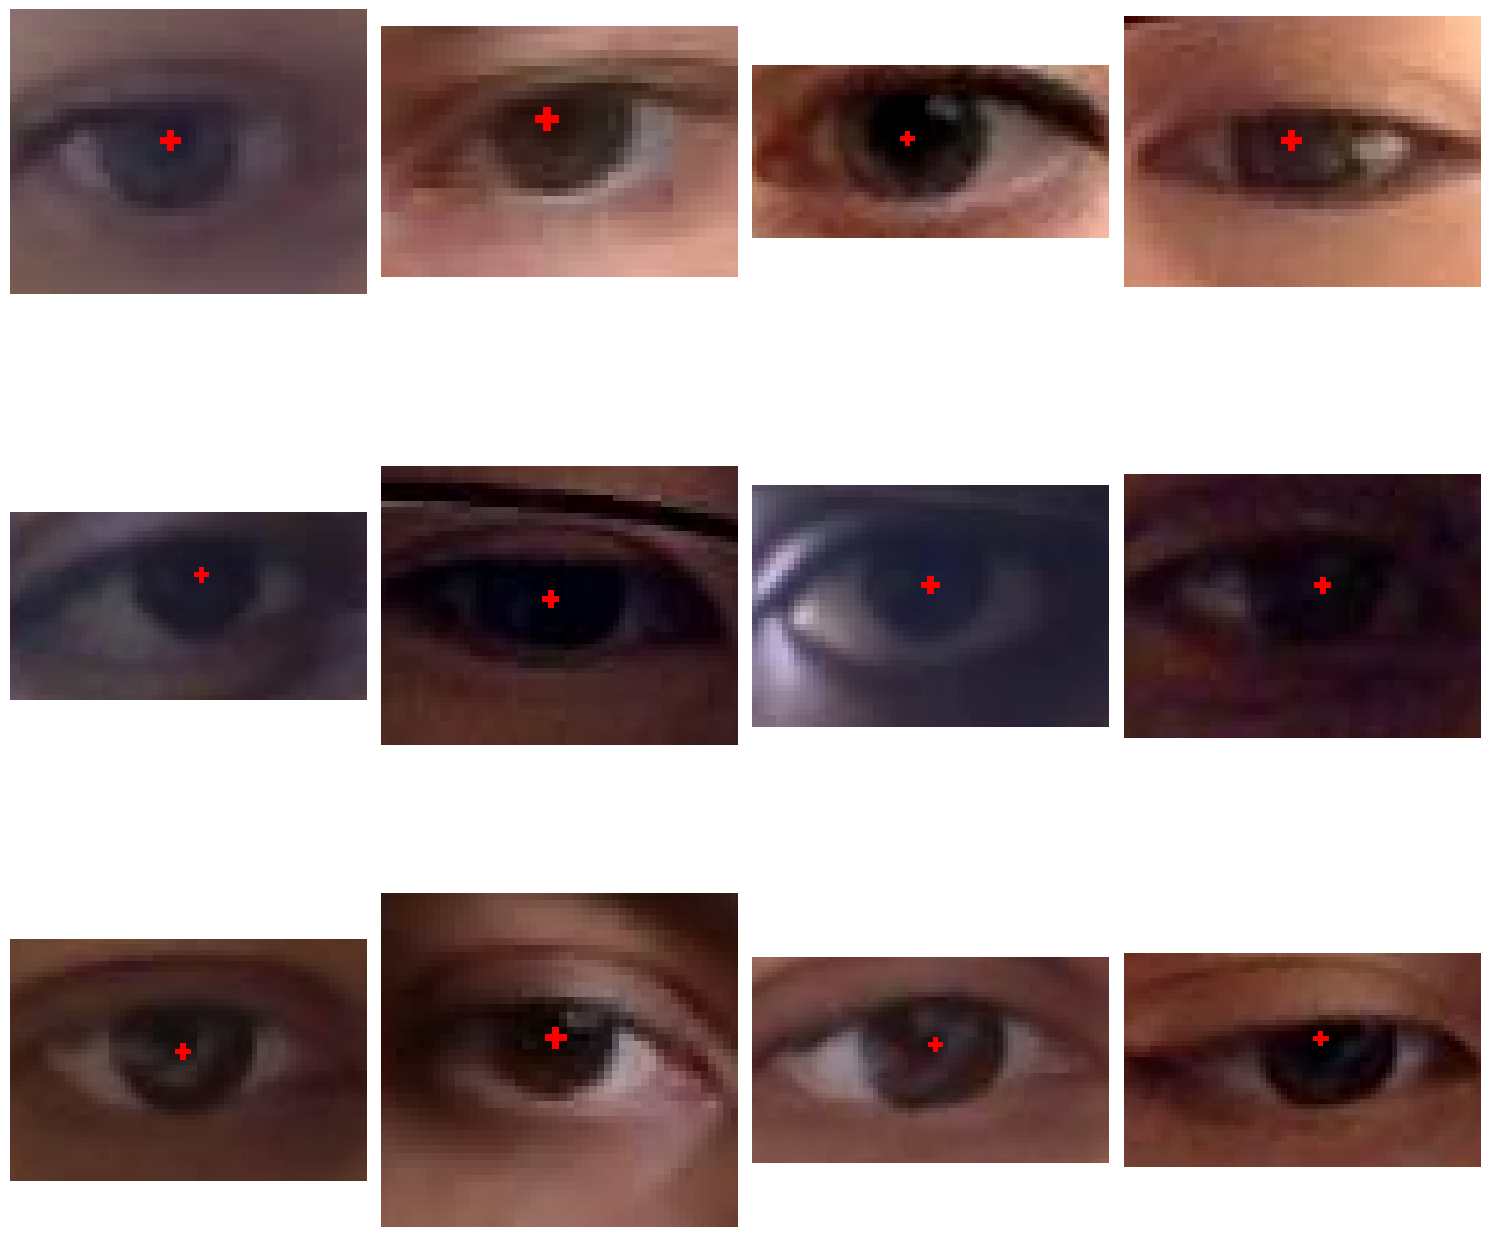

In [94]:
IMG_DIR = "/home/nipun/Documents/Uni_Malta/Datasets/CenterRegression/MixDataset/images"
visualizeDatasets(MP2gaze_DATASET,IMG_DIR)

# Ubris Experiment

In [15]:
import cv2
from glob import glob
import os
import numpy as np
import matplotlib.pyplot as plt

image_path = "/home/nipun/Documents/Uni_Malta/Datasets/Datasets/UBRIS/val_img/"
mask_path = "/home/nipun/Documents/Uni_Malta/Datasets/Datasets/UBRIS/val_masks/"
save_location = "/home/nipun/Documents/Uni_Malta/Datasets/Datasets/UBRIS//Masks_with_256_val"

images = sorted(glob(f"{image_path}/*"))
masks = sorted(glob(f"{mask_path}/*"))

In [16]:
valid_classes = [0,85, 170]
class_names = ["Background","Pupil","Iris"]


class_map = dict(zip(valid_classes, range(len(valid_classes))))
n_classes=len(valid_classes)



colors = [ [  0,   0,   0],[0,255,0],[0,0,255]] # Black # Green  # Red
label_colours = dict(zip(range(n_classes), colors))

In [17]:
def encode_segmap(mask):
    for _validc in valid_classes:
        mask[mask == _validc] = class_map[_validc]
    return mask

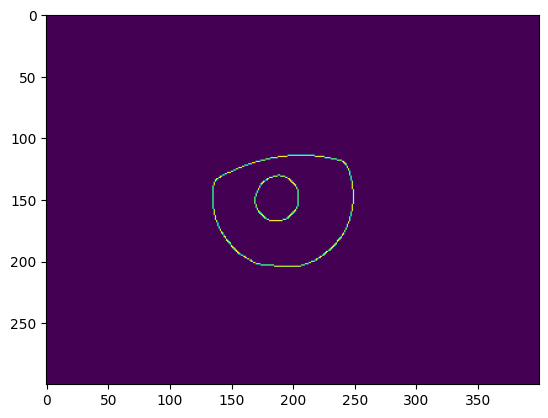

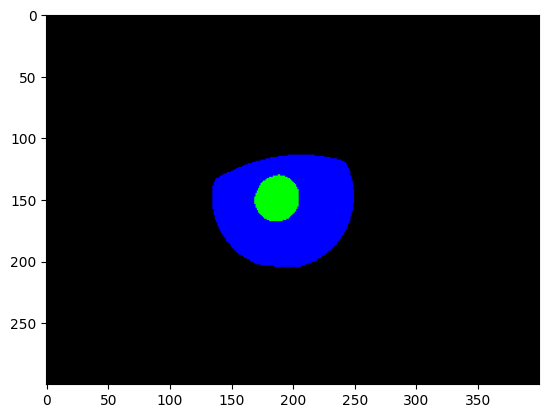

[993.0, 1014.0, 8310.0, 8343.0]


In [22]:
for i,(mask_path) in enumerate(masks):
    
    gt_mask = cv2.imread(mask_path) # 300 400 3
    
    gt_mask_gray = cv2.cvtColor(gt_mask,cv2.COLOR_BGR2GRAY) # 300 400
    
    
    medianBlur = cv2.medianBlur(gt_mask_gray,5)
    
    
    edge_detected_image = cv2.Canny(medianBlur, 0, 200)
        
    plt.imshow(edge_detected_image)
    plt.show()
    bg_mask = np.zeros_like(gt_mask)
    
    
    contours, hierarchy = cv2.findContours(edge_detected_image, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
        
    contour_list = []
    max_area = {}
    for contour in contours:
        
        approx = cv2.approxPolyDP(contour,0.01*cv2.arcLength(contour,True),True)
        area = cv2.contourArea(contour)
        # print(area)
        if ((len(approx) > 8) & (len(approx) < 23) & (area > 30) ):
            
            
            max_area[area] = contour
            
    
    x = sorted(max_area,key = lambda x:x)

    max_contour = max_area[x[-1]]
    min_contour = max_area[x[1]]
    
    # print(max_contour)
    # print(min_contour)

    cv2.drawContours(bg_mask,[max_contour],0,(0,0,255),-1)

    cv2.drawContours(bg_mask,[min_contour],0,(0,255,0),-1)
    
    plt.imshow(bg_mask)
    plt.show()
    
    print(x)
    
    
    output_mask = []
    
    for i,color in enumerate(color_map):
        cmap = np.all
    if i==0:
        break

In [1]:
img_path = "/home/nipun/Documents/Uni_Malta/Datasets/Datasets/UBRIS/Masks_with_256_val/C100_S2_I9.png"

In [3]:
import cv2
import numpy as np
img = cv2.imread(img_path)

In [4]:
np.unique(img)

array([0, 1, 2], dtype=uint8)

In [29]:
import numpy as np


tensor = np.random.randint(0,5,size=(3,2,3))

In [30]:
tensor

array([[[3, 3, 1],
        [4, 0, 1]],

       [[3, 2, 4],
        [0, 0, 0]],

       [[2, 3, 0],
        [4, 0, 4]]])

In [31]:
np.sum(tensor,axis=0) # 2 3



array([[8, 8, 5],
       [8, 0, 5]])

In [32]:
np.sum(tensor,axis=1) # 3 3

array([[7, 3, 2],
       [3, 2, 4],
       [6, 3, 4]])

In [33]:
np.sum(tensor,axis=2) # 3 2

array([[7, 5],
       [9, 0],
       [5, 8]])

In [34]:
np.sum(tensor,axis=-1) # 3 2

array([[7, 5],
       [9, 0],
       [5, 8]])